## Charger les fichiers

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [8]:
path = 'Data_use_case_Yelp/'

restaurants_file = path + 'restaurants.csv'
checkin_file = path + 'checkin.csv'
review_file = path + 'review.csv'
tip_file = path + 'tip.csv'
user_file = path + 'user.csv'
services_file = path + 'services.csv'
hours_file = path + 'hours.csv'

In [9]:
business = pd.read_csv(restaurants_file,on_bad_lines='skip', low_memory=False)
user = pd.read_csv(user_file, on_bad_lines='skip', low_memory=False)
review = pd.read_csv(review_file, on_bad_lines='skip',low_memory=False)
checkin = pd.read_csv(checkin_file, on_bad_lines='skip',low_memory=False)
tip = pd.read_csv(tip_file, on_bad_lines='skip',low_memory=False)
services = pd.read_csv(services_file,on_bad_lines='skip',low_memory=False)
hours = pd.read_csv(hours_file, on_bad_lines='skip',low_memory=False)


## Nettoyage de code, filtrage et plus

In [10]:
#Colonnes à garder business
business = business[[
    "business_id", "nom", "moyenne_etoiles", "ville", "zone", "ferme"
]]
business.head()

,business_id,nom,moyenne_etoiles,ville,zone,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,Denny's,2.5,Las Vegas,89110,0
1,pd0v6sOqpLhFJ7mkpIaixw,Ike's Love & Sandwiches,4.0,Phoenix,85004,0
2,0vhi__HtC2L4-vScgDFdFw,Midori Japanese Cafe,3.5,Calgary,T2T,0
3,t65yfB9v9fqlhAkLnnUXdg,Pho U,3.5,Toronto,M5A,0
4,i7_JPit-2kAbtRTLkic2jA,John & Sons Oyster House,4.0,Toronto,M5H,0


In [11]:
business_ouverts = business[business["ferme"] == 0][["business_id", "ferme"]]
business_ouverts.head()


,business_id,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,0
1,pd0v6sOqpLhFJ7mkpIaixw,0
2,0vhi__HtC2L4-vScgDFdFw,0
3,t65yfB9v9fqlhAkLnnUXdg,0
4,i7_JPit-2kAbtRTLkic2jA,0


In [12]:
#Colonnes à garder pour review
review_cols = ["review_id","user_id","business_id","etoiles","useful","funny","cool","date"
]
review.head()


,review_id,user_id,business_id,etoiles,useful,funny,cool,date
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,2018-01-09 20:56:38
1,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,2010-10-05 19:12:35
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,2016-05-07 01:36:53
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00


In [13]:
#renommer les colonnes utilisateur et restaurant
review = review.rename(columns={
    "utilisateur_id": "user_id",
    "restaurant_id": "business_id"
})

In [14]:

review = review.dropna(subset=["review_id","user_id","business_id","etoiles","useful","funny","cool","date"])
review.head()

,review_id,user_id,business_id,etoiles,useful,funny,cool,date
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,2018-01-09 20:56:38
1,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,2010-10-05 19:12:35
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,2016-05-07 01:36:53
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00


In [15]:
#Convertir la date en format datetime
review["date"] = pd.to_datetime(review["date"], errors="coerce")

review.head()

,review_id,user_id,business_id,etoiles,useful,funny,cool,date
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,2018-01-09 20:56:38
1,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,2010-10-05 19:12:35
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,2016-05-07 01:36:53
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00


In [16]:
#Nettoyer Users
user_cols = ["user_id", "nom", "elite", "nb_avis", "nb_avis_mention"]
user = user[user_cols]

user.head()

,user_id,nom,elite,nb_avis,nb_avis_mention
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,1,95,84
1,4XChL029mKr5hydo79Ljxg,Jenna,0,33,48
2,bc8C_eETBWL0olvFSJJd0w,David,0,16,28
3,MM4RJAeH6yuaN8oZDSt0RA,Nancy,1,361,1114
4,TEtzbpgA2BFBrC0y0sCbfw,Keane,1,1122,13311


In [17]:
#Nettoyage TIP 
tip_cols = ["user_id", "business_id", "nb_compliments", "date"] 
tip = tip[tip_cols]

tip.head()

,user_id,business_id,nb_compliments,date
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24
1,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17
2,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49
3,CaFbX7topxdLpBJ_SNDfGQ,r49iBfbnfoK7yt4rdsL_7g,0,2016-01-05 06:39:33
4,8zXgNCkusOHMwh5Tj_8yCQ,qrSsS0pk7SL67MP5nN8tlg,0,2013-12-22 05:10:12


In [18]:
#Nettoyer Hours
hour_cols = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]

#Retirer les lignes où toutes les heures sont vides
hours = hours.dropna(subset=hour_cols, how="all")

#Garder uniquement business_id et les colonnes d'heures
hours_cols_keep = ["business_id"] + hour_cols
hours = hours[hours_cols_keep]

hours.head()

,business_id,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
0,lCwqJWMxvIUQt1Re_tDn4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
1,pd0v6sOqpLhFJ7mkpIaixw,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-22:0,11:0-22:0,11:0-17:0
2,0vhi__HtC2L4-vScgDFdFw,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-22:0,16:30-21:30
3,t65yfB9v9fqlhAkLnnUXdg,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,11:30-21:0
4,i7_JPit-2kAbtRTLkic2jA,11:30-22:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-23:0,NaN,NaN


In [19]:
#Nettoyer Checkin
checkin["date"] = checkin["date"].fillna("").str.strip()
checkin["date_list"] = checkin["date"].apply(lambda d: d.split(",") if d != "" else [])

checkin.head()

,business_id,date,date_list
0,--1UhMGODdWsrMastO9DZw,2016-04-26 19:49:16,[2016-04-26 19:49:16]
1,--1UhMGODdWsrMastO9DZw,2016-08-30 18:36:57,[2016-08-30 18:36:57]
2,--1UhMGODdWsrMastO9DZw,2016-10-15 02:45:18,[2016-10-15 02:45:18]
3,--1UhMGODdWsrMastO9DZw,2016-11-18 01:54:50,[2016-11-18 01:54:50]
4,--1UhMGODdWsrMastO9DZw,2017-04-20 18:39:06,[2017-04-20 18:39:06]


In [20]:
#Nettoyer Hours
hour_cols = ["lundi","mardi","mercredi",
             "jeudi","vendredi","samedi","dimanche"]
hours = hours.dropna(subset=hour_cols, how="all")

hours.head()

,business_id,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
0,lCwqJWMxvIUQt1Re_tDn4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
1,pd0v6sOqpLhFJ7mkpIaixw,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-22:0,11:0-22:0,11:0-17:0
2,0vhi__HtC2L4-vScgDFdFw,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-22:0,16:30-21:30
3,t65yfB9v9fqlhAkLnnUXdg,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,11:30-21:0
4,i7_JPit-2kAbtRTLkic2jA,11:30-22:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-23:0,NaN,NaN


In [21]:
prix = services[["business_id", "prix"]]
prix.head()

,business_id,prix
0,lCwqJWMxvIUQt1Re_tDn4w,2
1,pd0v6sOqpLhFJ7mkpIaixw,2
2,0vhi__HtC2L4-vScgDFdFw,2
3,t65yfB9v9fqlhAkLnnUXdg,1
4,i7_JPit-2kAbtRTLkic2jA,3


In [22]:
# Filtrer les filles
villes= ["Phoenix", "Las Vegas", "Toronto"]
business = business[business["ville"].isin(villes)]

business.head()

,business_id,nom,moyenne_etoiles,ville,zone,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,Denny's,2.5,Las Vegas,89110,0
1,pd0v6sOqpLhFJ7mkpIaixw,Ike's Love & Sandwiches,4.0,Phoenix,85004,0
3,t65yfB9v9fqlhAkLnnUXdg,Pho U,3.5,Toronto,M5A,0
4,i7_JPit-2kAbtRTLkic2jA,John & Sons Oyster House,4.0,Toronto,M5H,0
5,vMh4madPU3qhNX7P7d8WGA,Ray's Pizza II,3.0,Phoenix,85085,0


In [23]:
# filtrer review, tip, checkin, hours selon business_id
id_validation = set(business["business_id"])
review = review[review["business_id"].isin(id_validation)]
tip = tip[tip["business_id"].isin(id_validation)]
checkin = checkin[checkin["business_id"].isin(id_validation)]
hours = hours[hours["business_id"].isin(id_validation)]


In [24]:
business.head()

,business_id,nom,moyenne_etoiles,ville,zone,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,Denny's,2.5,Las Vegas,89110,0
1,pd0v6sOqpLhFJ7mkpIaixw,Ike's Love & Sandwiches,4.0,Phoenix,85004,0
3,t65yfB9v9fqlhAkLnnUXdg,Pho U,3.5,Toronto,M5A,0
4,i7_JPit-2kAbtRTLkic2jA,John & Sons Oyster House,4.0,Toronto,M5H,0
5,vMh4madPU3qhNX7P7d8WGA,Ray's Pizza II,3.0,Phoenix,85085,0


In [25]:
review.head()

,review_id,user_id,business_id,etoiles,useful,funny,cool,date
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00
5,4bUyL7lzoWzDZaJETAKREg,_N7Ndn29bpll_961oPeEfw,y-Iw6dZflNix4BdwIyTNGA,3.0,0,0,0,2014-06-27 21:19:23
6,D_UvaenM25iNd6aehTZ0MA,8NwU4TRsD3S6gIfBqFzDMQ,Sfc8Haz2Yri8Mo1L0E0TsA,5.0,0,0,0,2012-11-06 03:41:43
7,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,2014-12-17 19:04:33


In [26]:
tip.head()

,user_id,business_id,nb_compliments,date
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24
1,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17
3,CaFbX7topxdLpBJ_SNDfGQ,r49iBfbnfoK7yt4rdsL_7g,0,2016-01-05 06:39:33
4,8zXgNCkusOHMwh5Tj_8yCQ,qrSsS0pk7SL67MP5nN8tlg,0,2013-12-22 05:10:12
5,DfvT4F5Eqx9Xr3Ei3GYWPg,63bHLJUomC22Xdm3IjgBtw,0,2011-10-18 18:29:05


In [27]:
checkin.head()

,business_id,date,date_list
173,--DaPTJW3-tB1vP-PfdTEg,2012-06-03 17:46:09,[2012-06-03 17:46:09]
174,--DaPTJW3-tB1vP-PfdTEg,2012-08-04 16:19:52,[2012-08-04 16:19:52]
175,--DaPTJW3-tB1vP-PfdTEg,2012-08-04 16:26:17,[2012-08-04 16:26:17]
176,--DaPTJW3-tB1vP-PfdTEg,2012-08-06 20:14:27,[2012-08-06 20:14:27]
177,--DaPTJW3-tB1vP-PfdTEg,2012-08-09 22:17:11,[2012-08-09 22:17:11]


In [28]:
hours.head()

,business_id,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
0,lCwqJWMxvIUQt1Re_tDn4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
1,pd0v6sOqpLhFJ7mkpIaixw,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-22:0,11:0-22:0,11:0-17:0
3,t65yfB9v9fqlhAkLnnUXdg,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,11:30-21:0
4,i7_JPit-2kAbtRTLkic2jA,11:30-22:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-23:0,NaN,NaN
7,es3Fq9KNp6Ry994x4T4ZYg,6:30-16:0,6:30-16:0,6:30-16:0,6:30-16:0,6:30-16:0,7:0-14:0,NaN


## les jointures et les indicateurs


In [29]:
##### Compter combien il y a de réstaurant avec le meme nom #####
countingName = business["nom"].value_counts()
business["is_chain"] = business["nom"].map(countingName >= 3)

In [30]:
##### Compter le nombre de fois que le business apparait dans review #####
review_count = review["business_id"].value_counts().reset_index()
review_count.columns = ["business_id", "review_count_total"]

## Fusion review_count_total
business = business.merge(
    review_count,
    on="business_id",
    how="left"
)

## Nettoyage
business["review_count_total"] = business["review_count_total"].fillna(0).astype(int)


In [31]:
##### Calculer le nombre de check in avec les dates #####
checkin_count = checkin.groupby("business_id")["date"].count().reset_index()
checkin_count.columns = ["business_id", "checkins_total"]

## Fusion checkins_total 
business = business.merge(
    checkin_count,
    on="business_id",
    how="left"
)

## Nettoyage
business["checkins_total"] = business["checkins_total"].fillna(0).astype(int)



In [32]:

##### Ratio avis positif avec +4 stars #####
total_reviews = review.groupby("business_id")["etoiles"].count()
positive_reviews = review[review["etoiles"] >= 4].groupby("business_id")["etoiles"].count()

positive_ratio = (positive_reviews / total_reviews).fillna(0).reset_index().round(2)

positive_ratio.columns = ["business_id", "positive_ratio"]
positive_ratio["positive_ratio"] = positive_ratio["positive_ratio"].round(2)


## Fusion positive_ratio
business = business.merge(
    positive_ratio,
    on="business_id",
    how="left"
)

## Nettoyage
business["positive_ratio"] = business["positive_ratio"].fillna(0)


In [33]:

##### Community : Compter le nombre d'avis par des utilisateurs élites #####
eliteUsers_List = user[user["elite"] != 0]["user_id"].tolist()
review["is_elite_reviewer"] = review["user_id"].isin(eliteUsers_List).astype(int)

elite_review_count = review.groupby("business_id")["is_elite_reviewer"].sum().reset_index()
elite_review_count.columns = ["business_id", "elite_review_count"]

### Fusion elite_review
business = business.merge(
    elite_review_count,
    on="business_id",
    how="left"
)

## Nettoyage
business["elite_review_count"] = business["elite_review_count"].fillna(0).astype(int)


In [ ]:

##### Changement prix en string #####
def changementString(price):
    if price == 1:
        return "Pas cher"
    elif price == 2:
        return "Normal"
    elif price == 3:
        return "Cher"
    elif price == 4:
        return "Très cher"
    else:
        return "NA"

# fusion prix
business = business.merge(
    services[["business_id", "prix"]],
    on="business_id",
    how="left"
)

## Source : https://stackoverflow.com/questions/33506826/call-function-use-apply-in-python
business["price_category"] = business["prix"].apply(changementString)




In [ ]:
def convertisseursHours()

In [35]:

##### Dataframe final #####
df_merge = business[[ 
    "nom",
    "ville",
    "price_category",
    "moyenne_etoiles",  
    "is_chain",
    "checkins_total",
    "review_count_total",
    "positive_ratio",
    "elite_review_count",
]].copy()

## simple rename pour avg_stars
dataframe_final = df_merge.rename(columns={"moyenne_etoiles": "avg_stars"})

dataframe_final.head()


,nom,ville,price_category,avg_stars,is_chain,checkins_total,review_count_total,positive_ratio,elite_review_count
0,Denny's,Las Vegas,Normal,2.5,True,181,72,0.31,6
1,Ike's Love & Sandwiches,Phoenix,Normal,4.0,False,492,108,0.76,25
2,Pho U,Toronto,Pas cher,3.5,False,18,36,0.58,3
3,John & Sons Oyster House,Toronto,Cher,4.0,False,110,88,0.72,37
4,Ray's Pizza II,Phoenix,Normal,3.0,False,16,16,0.50,3


## Vérifier les types

In [36]:
business["business_id"] = business["business_id"].astype(str)
business["nom"] = business["nom"].astype(str)
business["moyenne_etoiles"] = business["moyenne_etoiles"].astype(float)
business["ville"] = business["ville"].astype(str)
business["zone"] = business["zone"].astype(str) 
business["ferme"] = business["ferme"].astype(int)



In [37]:
business.dtypes

business_id            object
nom                    object
moyenne_etoiles       float64
ville                  object
zone                   object
ferme                   int64
is_chain                 bool
review_count_total      int64
checkins_total          int64
positive_ratio        float64
elite_review_count      int64
prix                    int64
price_category         object
dtype: object

In [38]:
review["review_id"] = review["review_id"].astype(str)
review["user_id"] = review["user_id"].astype(str)
review["business_id"] = review["business_id"].astype(str)
review["etoiles"] = review["etoiles"].astype(float)
review["useful"] = review["useful"].astype(int)
review["funny"] = review["funny"].astype(int)
review["cool"] = review["cool"].astype(int)
review["date"] = pd.to_datetime(review["date"], errors="coerce")


In [39]:
review.dtypes

review_id                    object
user_id                      object
business_id                  object
etoiles                     float64
useful                        int64
funny                         int64
cool                          int64
date                 datetime64[ns]
is_elite_reviewer             int64
dtype: object

In [40]:
user["user_id"] = user["user_id"].astype(str)
user["nom"] = user["nom"].astype(str)
user["elite"] = user["elite"].astype(str)
user["nb_avis"] = user["nb_avis"].astype(int)
user["nb_avis_mention"] = user["nb_avis_mention"].astype(int)


In [41]:
user.dtypes

user_id            object
nom                object
elite              object
nb_avis             int64
nb_avis_mention     int64
dtype: object

In [42]:
hours["business_id"] = hours["business_id"].astype(str)

hour_cols = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]

for col in hour_cols:
    hours[col] = hours[col].astype(str)


In [43]:
hours.dtypes

business_id    object
lundi          object
mardi          object
mercredi       object
jeudi          object
vendredi       object
samedi         object
dimanche       object
dtype: object

In [44]:
checkin["business_id"] = checkin["business_id"].astype(str)

In [45]:
checkin.dtypes

business_id    object
date           object
date_list      object
dtype: object

In [46]:
tip["user_id"] = tip["user_id"].astype(str)
tip["business_id"] = tip["business_id"].astype(str)
tip["nb_compliments"] = tip["nb_compliments"].astype(int)
tip["date"] = pd.to_datetime(tip["date"], errors="coerce")


In [47]:
tip.dtypes

user_id                   object
business_id               object
nb_compliments             int64
date              datetime64[ns]
dtype: object

In [48]:
services["business_id"] = services["business_id"].astype(str)

serviceEnInt = ["emporter","livraison","bon_pour_groupes","bon_pour_enfants","reservation","prix","terrasse"]

for col in serviceEnInt:
    services[col] = services[col].astype(int)


In [49]:
services.dtypes

business_id         object
emporter             int64
livraison            int64
bon_pour_groupes     int64
bon_pour_enfants     int64
reservation          int64
prix                 int64
terrasse             int64
dtype: object

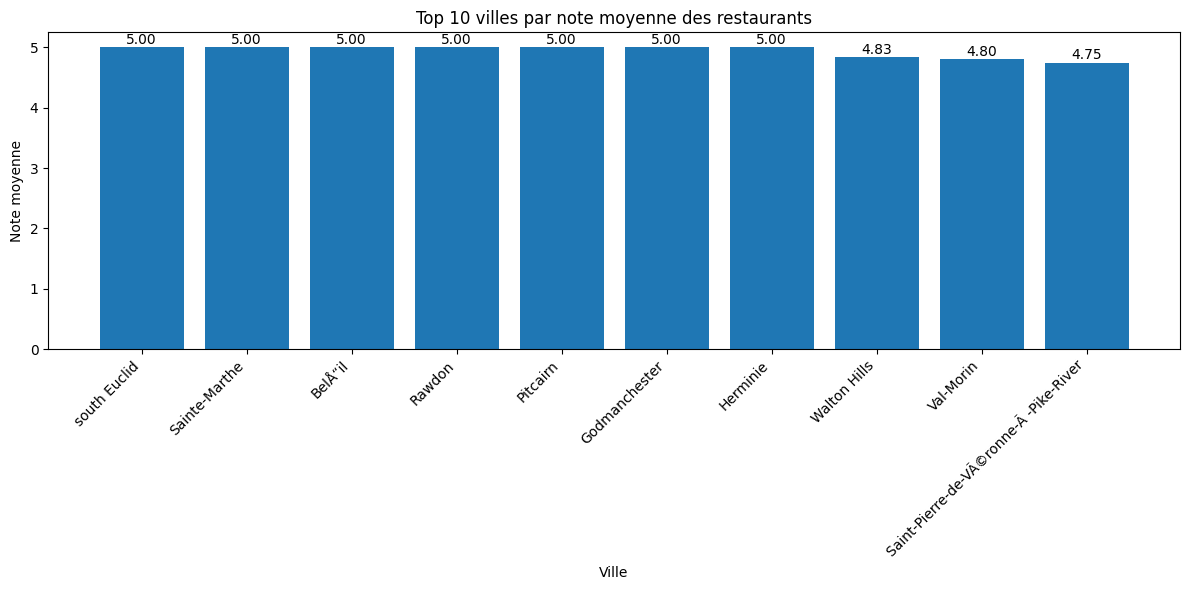

In [50]:
#read les bon fichiers
business = pd.read_csv("Data_use_case_Yelp/restaurants.csv", low_memory=False)
review = pd.read_csv("Data_use_case_Yelp/review.csv", low_memory=False)

# merge de restaurants + review
merged = business.merge(review, on="business_id", how="inner")

# calcul de la note moyenne par ville
ville_avg = (
    #moyenne des notes de review 
    merged.groupby("ville")["etoiles"]
          .mean()
          .sort_values(ascending=False)
)

top10_ville = ville_avg.head(10)

# affichage du graphique
plt.figure(figsize=(12,6))
plt.bar(top10_ville.index, top10_ville.values, color="#1f77b4")

# ajouter les valeurs en nombre sur chaque barre
for i, val in enumerate(top10_ville.values):
    plt.text(i, val + 0.05, f"{val:.2f}", ha="center")

plt.title("Top 10 villes par note moyenne des restaurants")
plt.xlabel("Ville")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Top 10 villes par note moyenne des restaurants

Ce graphique montre les villes qui obtiennent les meilleures notes moyennes de restaurants selon les avis disponibles. On observe que certaines villes obtiennent systématiquement des évaluations très élevées, ce qui peut refléter une meilleure satisfaction générale. Cela permet de comparer rapidement la perception globale des restaurants entre différentes localités. Ce type d’analyse est utile pour repérer les régions offrant la meilleure qualité perçue en restauration.

In [51]:
# calcul des meilleurs restaurants par ville

best_restau_par_ville = (
    #merged qui est utiliser pour le graph statique d'en haut
    merged.groupby(["ville", "business_id"])
          .agg(
              nom=("nom", "first"),
              moyenne_etoiles=("moyenne_etoiles", "mean")
          )
          .reset_index()
)

villes = sorted(best_restau_par_ville["ville"].unique())

def carte_restaurant(ville):
    df = best_restau_par_ville[best_restau_par_ville["ville"] == ville]

    if df.empty:
        plt.figure(figsize=(6,3))
        plt.text(0.5, 0.5, "Aucun restaurant trouvé", ha="center", fontsize=14)
        plt.axis("off")
        plt.show()
        return

    # top restaurants selon la note
    best = df.sort_values("moyenne_etoiles", ascending=False).head(5)

    plt.figure(figsize=(10,5))
    plt.bar(best["nom"], best["moyenne_etoiles"], color="#1f77b4")

    plt.title(f"Meilleur(s) restaurant(s) à {ville}", pad=15)
    plt.ylabel("Note moyenne")
    plt.ylim(0, 5.3) #je l'ai rajouter pour empecher la valeur afficher de brouiller le titre quand la valeur est 5.00

    # ajouter les valeurs sur les barres
    for i, val in enumerate(best["moyenne_etoiles"]):
        plt.text(i, val + 0.05, f"{val:.2f}", ha="center")

    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()
    plt.show()

interact(carte_restaurant, ville=villes);


interactive(children=(Dropdown(description='ville', options=('AGINCOURT', 'Ahwatukee', 'Airdrie', 'Ajax', 'Akr…

Meilleur(s) restaurant(s) par ville
 
Ce graphique interactif permet de visualiser les meilleurs restaurants dans chaque ville selon leur note moyenne. L’utilisateur peut sélectionner une ville et obtenir instantanément les restaurants les mieux évalués. Cette approche est très pratique pour identifier les établissements les plus recommandés dans une région donnée. Elle peut par exemple aider un visiteur à choisir rapidement où manger lorsqu’il découvre une nouvelle ville.